In [1]:
%load_ext autoreload
%autoreload 2

import fooof
from fooof.sim.gen import gen_aperiodic      # for looking at aperiodic details
from fooof.plts.spectra import plot_spectrum # for looking at aperiodic details
from fooof.plts.periodic import plot_peak_fits 
from fooof.plts.periodic import plot_peak_params
#from fooof.plts.annotate import plot_annotated_peak_search

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cycler
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from scipy.io import loadmat
import math

from data_utils import load_and_fit, invert_peak_data
from plot_tools import plotFlatComps, peakPlot, peakDataScatter, exponentPlot, peakDistr
from fooof.sim.gen import gen_power_spectrum

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

from fooof.plts.annotate import plot_annotated_peak_search 
from plot_tools import _prox_query

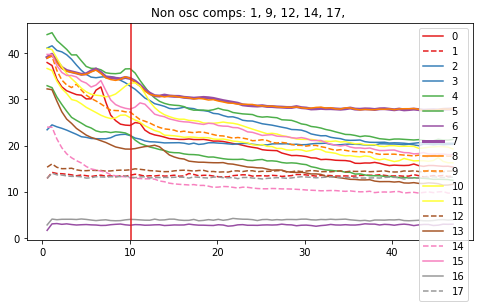

In [2]:
p_spectrum = loadmat('data/spectra/dip_only/brian_diponly_3_spectra.mat')
specfreqs, specdata = p_spectrum['specfreqs'][0], p_spectrum['specdata']
group_spec = specdata.mean(0)[0]
fg = fooof.FOOOFGroup(aperiodic_mode='fixed', verbose = False, min_peak_height = 0.025)
fg.fit(specfreqs, group_spec.T, [3, 40])
oscs = fg.get_params('peak_params', 'CF')
bumpy_comps = set([int(i) for i in oscs[:,1]])

n_ = group_spec.shape[1]
color = plt.cm.Set1(np.linspace(0, 1,n_)) #color = cmap(np.linspace(0, 1,n_))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
flat_comps = 'Non osc comps: '
plt.figure(figsize=(8,4))
for i in range(n_):
    lw = 1.5
    linestyle = '-'
    if i not in bumpy_comps:
        linestyle = '--'
        flat_comps += "{}, ".format(i)
    if i == 7: lw = 3
    plt.plot(specfreqs[:84], group_spec[:,i][:84], linestyle = linestyle, marker='',markevery=[17],label = str(i), lw = lw)
plt.axvline(10.151271039)
plt.legend()
plt.title(flat_comps)
plt.show()

In [4]:
group_df = load_and_fit(dimension = 'component', freqrange = [3,35], omit_r2 = 0.7, min_peak_height = .025)
type(group_df)

dict

In [14]:
peaks = group_df['cluster 3']['peak data']
peaks

{'CF': array([[ 6.5904143 ,  0.        ],
        [10.94044093,  0.        ],
        [21.53618419,  0.        ],
        [ 9.09749922,  1.        ],
        [19.79270958,  1.        ],
        [ 9.39620617,  2.        ],
        [ 9.34714666,  3.        ],
        [ 9.93792466,  4.        ],
        [ 6.31183919,  5.        ],
        [ 9.67555968,  5.        ],
        [ 6.35239345,  6.        ],
        [ 9.74081562,  6.        ],
        [10.09966852,  8.        ],
        [10.6040315 ,  9.        ],
        [20.80207392,  9.        ],
        [12.89171189, 10.        ],
        [ 6.71537929, 12.        ],
        [11.64079257, 12.        ]]), 'PW': array([[ 0.08008538,  0.        ],
        [ 0.02640353,  0.        ],
        [ 0.02807822,  0.        ],
        [ 0.04492271,  1.        ],
        [ 0.02700726,  1.        ],
        [ 0.02720237,  2.        ],
        [ 0.03927174,  3.        ],
        [ 0.05919574,  4.        ],
        [ 0.02963251,  5.        ],
        [ 0.032

In [15]:
group_df

{'cluster 3': {'spectral exponent': array([0.28477276, 0.25031992, 0.04127096, 0.24320284, 0.23123645,
         0.11700827, 0.11411657, 0.24441423, 0.21615753, 0.22278352,
         0.25937738, 0.22321604, 0.23910258]),
  'peak data': {'CF': array([[ 6.5904143 ,  0.        ],
          [10.94044093,  0.        ],
          [21.53618419,  0.        ],
          [ 9.09749922,  1.        ],
          [19.79270958,  1.        ],
          [ 9.39620617,  2.        ],
          [ 9.34714666,  3.        ],
          [ 9.93792466,  4.        ],
          [ 6.31183919,  5.        ],
          [ 9.67555968,  5.        ],
          [ 6.35239345,  6.        ],
          [ 9.74081562,  6.        ],
          [10.09966852,  8.        ],
          [10.6040315 ,  9.        ],
          [20.80207392,  9.        ],
          [12.89171189, 10.        ],
          [ 6.71537929, 12.        ],
          [11.64079257, 12.        ]]),
   'PW': array([[ 0.08008538,  0.        ],
          [ 0.02640353,  0.     